# TAREFA 3 - CNN NETWORK WITH MNIST

Para esta rede, seguimos o link do site:
Esta rede é feita a partir do keras com o tensorflow usando um modelo simples de 3 camadas, presente aqui:
https://victorzhou.com/blog/keras-neural-network-tutorial/

In [ ]:
!pip install mnist

download data

In [ ]:
import numpy as np
import mnist
from tensorflow import keras

# The first time you run this might be a bit slow, since the
# mnist package has to download and cache the data.
x_data = mnist.train_images()
y_data = mnist.train_labels()
num_classes = len(np.unique(y_data))

print(x_data.shape) # (60000, 28, 28)
print(y_data.shape) # (60000,)

(60000, 28, 28)
(60000,)


Preparing data and normalyzing

In [ ]:
import numpy as np
import mnist
from tensorflow import keras

x_test = mnist.test_images()
y_test = mnist.test_labels()

# Normalize the images.
x_data = (x_data / 255) - 0.5
x_test = (x_test / 255) - 0.5

# Reshape the images.
#yes, we won't be flattening the images here, idk why
x_data = np.expand_dims(x_data, axis=3)
x_test = np.expand_dims(x_test, axis=3)

print(x_data.shape) # (60000, 784)
print(x_test.shape)  # (10000, 784)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Model creation

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1000)              1025000   
_________________________________________________________________
dense_8 (Dense)              (None, 50)              

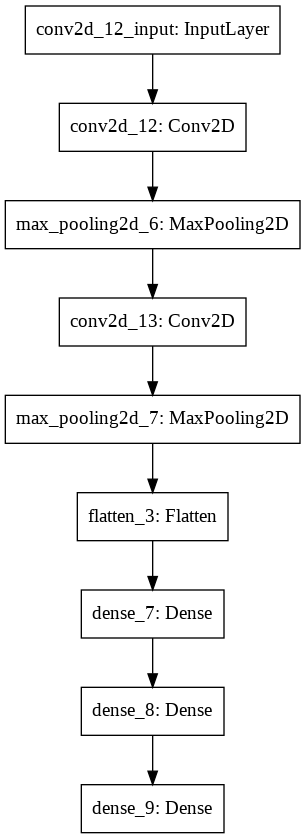

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import utils
from keras.utils import to_categorical
from IPython.display import Image, display
from keras.utils import plot_model

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), input_shape=(28, 28, 1), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

############COMPILANDO O MODELO.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model.summary()

plot_model(model,  to_file="model_MNIST.png")
display(Image('model_MNIST.png'))

AGORA VAMOS BOTAR PRA RODAR!

In [ ]:
##############TREINANDO O MODELO
model.fit(
  x_data,
  to_categorical(y_data), 
  epochs=5,
  batch_size=32,
)

loss, acc = model.evaluate(
  x_test,
  to_categorical(y_test)
)
print('\n ** Loss = %s; Acc = %s.' % (loss,acc))

Epoch 1/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.1132 - accuracy: 0.9639
Epoch 2/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0419 - accuracy: 0.9873
Epoch 3/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0293 - accuracy: 0.9911
Epoch 4/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0221 - accuracy: 0.9932
Epoch 5/5
313/313 [==============================] - 4s 13ms/step - loss: 0.0303 - accuracy: 0.9922

 ** Loss = 0.030277526006102562; Acc = 0.9922000169754028.


FASE DE FAZER OS TESTES FINAIS DE PREDIÇÃO

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

preds = model.predict(x_test)

#problist = [[] for x in xrange(n_classes)]
#auc = [[] for x in xrange(
#print(preds[:,1])
#print(preds[:,2])
auc_scores = []

print(y_test.shape)
print(preds[:,4].shape)
fpr, tpr, thresholds = roc_curve(y_test, preds)
#auc = roc_auc_score(y_test, preds[:,x])
#for x in range(n_classes):
    #auc = roc_auc_score(y_test, preds[:,x])
    #auc_scores.append(auc)

print(auc_scores)



(10000,)
(10000,)


ValueError: ignored